In [1]:
def f(x):
    return 3*x+5

In [2]:
start = -10000
stop = 10000
step = 0.01
x = [start + i*step for i in range(int((stop-start)/step))]

In [3]:
import random
y = [f(i) for i in x]

In [4]:
len(x)

2000000

In [5]:
x

[-10000.0,
 -9999.99,
 -9999.98,
 -9999.97,
 -9999.96,
 -9999.95,
 -9999.94,
 -9999.93,
 -9999.92,
 -9999.91,
 -9999.9,
 -9999.89,
 -9999.88,
 -9999.87,
 -9999.86,
 -9999.85,
 -9999.84,
 -9999.83,
 -9999.82,
 -9999.81,
 -9999.8,
 -9999.79,
 -9999.78,
 -9999.77,
 -9999.76,
 -9999.75,
 -9999.74,
 -9999.73,
 -9999.72,
 -9999.71,
 -9999.7,
 -9999.69,
 -9999.68,
 -9999.67,
 -9999.66,
 -9999.65,
 -9999.64,
 -9999.63,
 -9999.62,
 -9999.61,
 -9999.6,
 -9999.59,
 -9999.58,
 -9999.57,
 -9999.56,
 -9999.55,
 -9999.54,
 -9999.53,
 -9999.52,
 -9999.51,
 -9999.5,
 -9999.49,
 -9999.48,
 -9999.47,
 -9999.46,
 -9999.45,
 -9999.44,
 -9999.43,
 -9999.42,
 -9999.41,
 -9999.4,
 -9999.39,
 -9999.38,
 -9999.37,
 -9999.36,
 -9999.35,
 -9999.34,
 -9999.33,
 -9999.32,
 -9999.31,
 -9999.3,
 -9999.29,
 -9999.28,
 -9999.27,
 -9999.26,
 -9999.25,
 -9999.24,
 -9999.23,
 -9999.22,
 -9999.21,
 -9999.2,
 -9999.19,
 -9999.18,
 -9999.17,
 -9999.16,
 -9999.15,
 -9999.14,
 -9999.13,
 -9999.12,
 -9999.11,
 -9999.1,
 -9999.0

In [39]:
data = list(zip(x, y))

In [40]:
random.sample(data, 3)

[(2012.0100000000002, 6041.030000000001),
 (-1265.7399999999998, -3792.2199999999993),
 (-1735.539999999999, -5201.619999999997)]

In [41]:
def norm(l):
    lmax = max(l)
    lmin = min(l)
    return [((i-lmin)/(lmax-lmin)) for i in l]

In [8]:
def calculate_mean_variance(data):
    # Calculate the mean
    mean = sum(data) / len(data)
    
    # Calculate the variance
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    
    return mean, variance **0.5

In [7]:
def norm2(l):
    m, v = calculate_mean_variance(l)
    print(m, v)
    return [(i-m)/v for i in l]

In [9]:
x = norm2(x)
#y = norm2(y)
data = list(zip(x, y))
random.sample(data, 3)

-0.0050000000000117615 5773.502691895536


[(0.0027548268094385823, 52.69999999999891),
 (1.1260677178043363, 19509.049999999996),
 (0.38878045439397785, 6738.860000000002)]

In [26]:
a = 1; b = 2

In [18]:
norm([1,2, 3])

[0.5, 1.5, 2.5]

In [11]:
from micrograd.engine import Value

In [58]:
len(data)

20000

In [9]:
batch_size = 5

In [10]:
batch = random.sample(data, batch_size)

In [34]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [35]:
dot = draw_dot(loss)

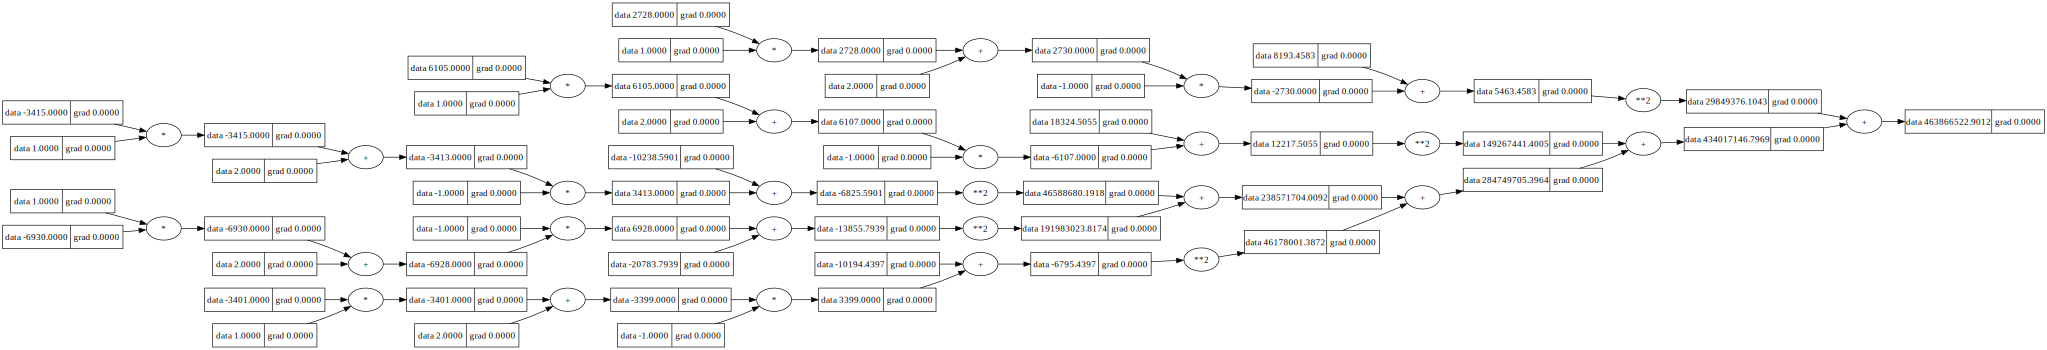

In [36]:
dot

In [37]:
loss.backward()

In [38]:
dot = draw_dot(loss)

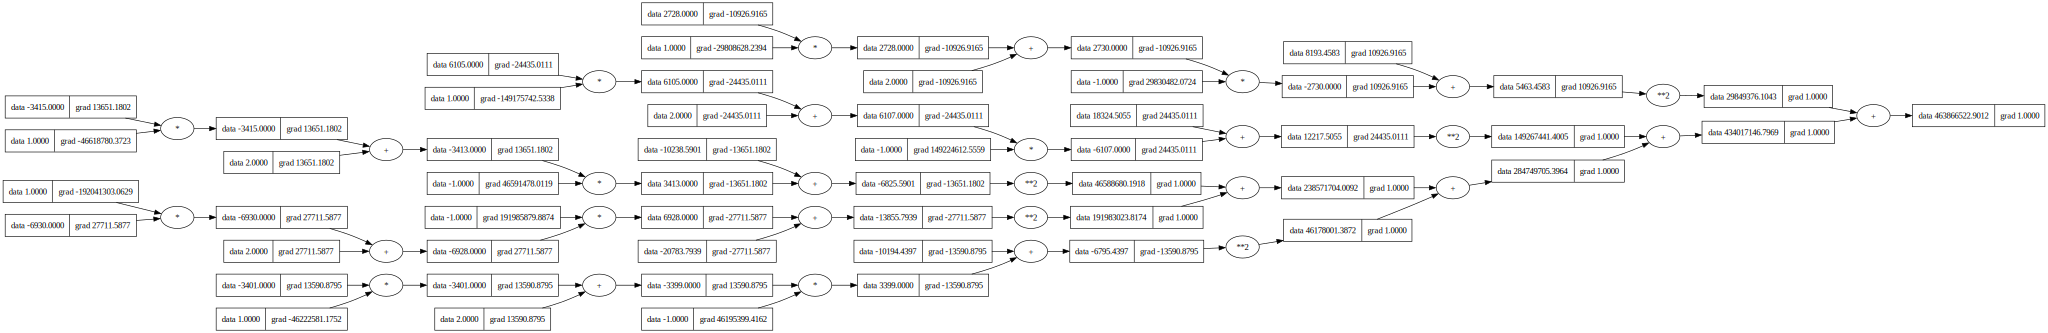

In [39]:
dot

In [45]:
a = 1; b= 2
a, b = [Value(a), Value(b)]
batch_size = 200

lr = 0.01

for i in range(5000):
    loss = None
    batch = random.sample(data, batch_size)
    for item in batch:
        x, y = item
        x = Value(x)
        y = Value(y)
        y_pred = a*x + b
        #print('pred:', y_pred.data, 'y', y.data)
        if not loss:
            loss = (y - y_pred)**2
        else:
            loss += (y - y_pred)**2
    loss = loss /batch_size
    #print('loss.grad', loss.grad)
    loss.backward()
    print('a.grad', a.grad, 'b.grad', b.grad,)
    a.data -= lr * a.grad
    b.data -= lr * b.grad
    a.grad = 0
    b.grad = 0
    
    print('a:', a.data, 'b:', b.data, 'loss:', loss.data)

a.grad -35963.820347688496 b.grad 51.75656696266947
a: 360.63820347688494 b: 1.4824343303733052 loss: 311437761.2254907
a.grad -32628.027498472333 b.grad -1044.7442310971928
a: 686.9184784616083 b: 11.929876641345233 loss: 276685379.9231244
a.grad -35143.49796998705 b.grad -1978.3310682454305
a: 1038.3534581614788 b: 31.713187323799538 loss: 292274391.48922515
a.grad -35128.51893216627 b.grad 321.82908034759646
a: 1389.6386474831415 b: 28.49489652032357 loss: 285988289.32306784
a.grad -33120.54376435286 b.grad 7088.990860209008
a: 1720.84408512667 b: -42.39501208176652 loss: 263902859.7712806
a.grad -34478.57946406567 b.grad -1697.3215265219642
a: 2065.6298797673267 b: -25.421796816546873 loss: 268967336.8128389
a.grad -31588.17046381879 b.grad -1222.9451826069155
a: 2381.5115844055144 b: -13.192344990477718 loss: 240955439.35158813
a.grad -29375.774116994475 b.grad 682.1251890098063
a: 2675.2693255754593 b: -20.013596880575783 loss: 219416093.61877966
a.grad -28250.555836365158 b.grad

In [13]:
a

Value(data=669032.2427759061, grad=0)

In [14]:
b

Value(data=-24.22565269350488, grad=0)

In [16]:
x

Value(data=-3261, grad=0)

In [17]:
y

Value(data=-9774.364069610747, grad=0)

In [27]:
batch[:10]

[(-8169, -24500.89758637621),
 (1140, 3426.9268117927877),
 (3419, 10264.044984267815),
 (9413, 28247.191066052514),
 (-7609, -22820.448951508097),
 (5999, 18005.269577662042),
 (3854, 11568.867379251782),
 (-125, -369.660489866932),
 (8706, 26126.192084042927),
 (2706, 8123.811410291625)]